In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [3]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [5]:
data=data.fillna(method="ffill")

In [6]:
data.gender=data.gender.map({"Female":1,"Male":0})

In [7]:
data["is_patient"]=data["is_patient"].map({1:0,2:1})

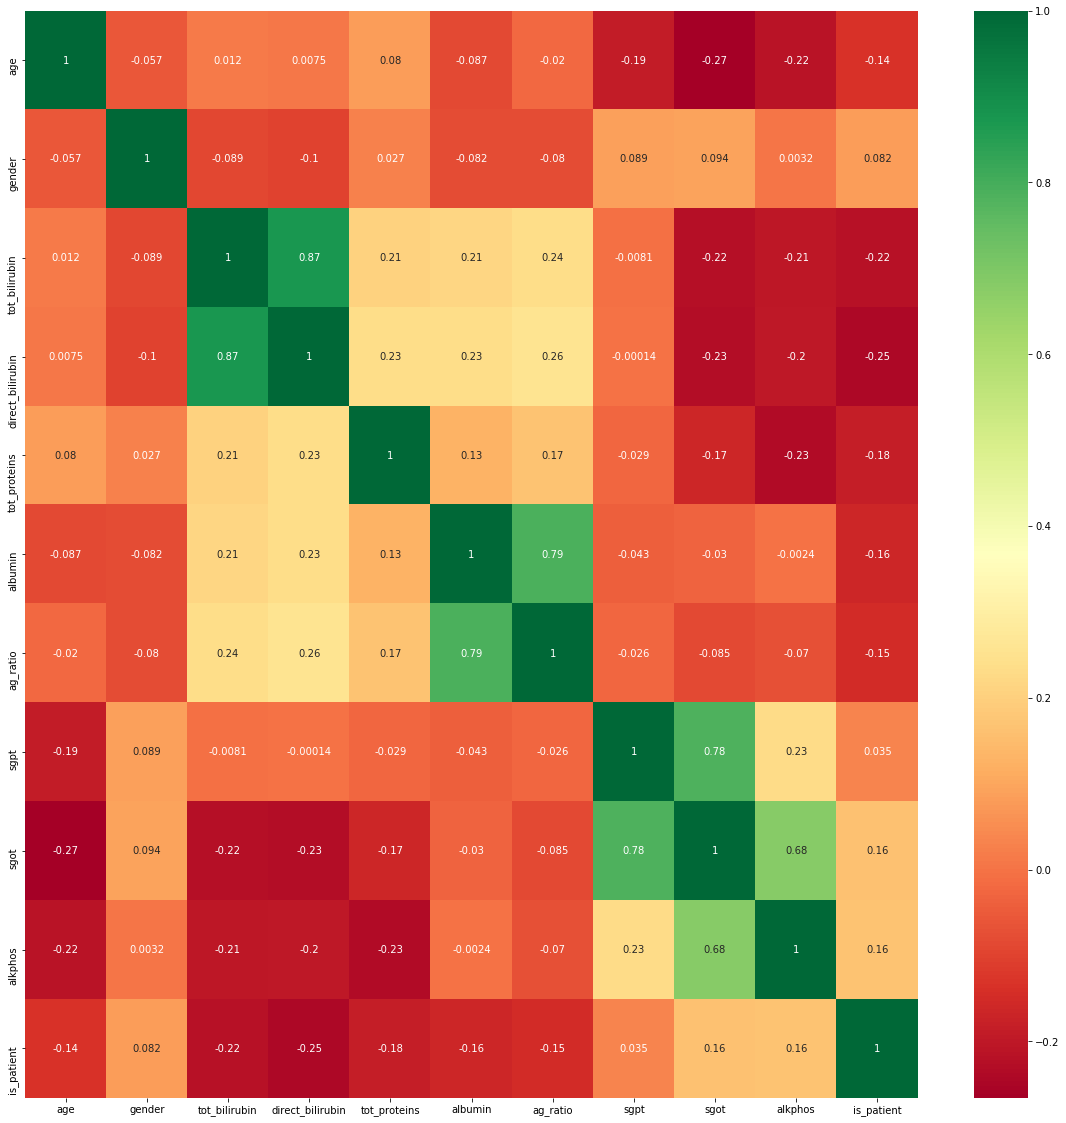

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
liver_true_count = len(data.loc[data['is_patient'] == True])
liver_false_count = len(data.loc[data['is_patient'] == False])

In [10]:
(liver_true_count , liver_false_count)

(167, 416)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(data, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 466
Rows in test set: 117



In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['is_patient']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [39]:
strat_train_set['is_patient'].value_counts()

0    333
1    133
Name: is_patient, dtype: int64

In [40]:
strat_test_set['is_patient'].value_counts()

0    83
1    34
Name: is_patient, dtype: int64

In [41]:
strat_train_set.shape

(466, 11)

In [42]:
strat_test_set.shape

(117, 11)

In [43]:
X_train =  strat_train_set.drop(["is_patient"],axis = 1)

In [44]:
y_train = strat_train_set["is_patient"]

In [45]:
X_test = strat_test_set.drop(["is_patient"],axis = 1)

In [46]:
y_test = strat_test_set["is_patient"]

In [47]:
print("This is full Data Shape = " , data.shape)
print("This is X_train Shape = " , X_train.shape)
print("This is X_test Shape = " ,  X_test.shape)
print("This is y_train Shape = " ,  y_train.shape)
print("This is y_test Shape = " , y_test.shape)

This is full Data Shape =  (583, 11)
This is X_train Shape =  (466, 10)
This is X_test Shape =  (117, 10)
This is y_train Shape =  (466,)
This is y_test Shape =  (117,)


In [48]:
print(data.columns)

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')


## Apply LogisticRegression Algorithm

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
sm=SMOTE()
sc=StandardScaler()
# lr=RandomForestClassifier()
lr=LogisticRegression()
source=sc.fit_transform(X_test , X_train)
# X_train,X_test,y_train,y_test= train_test_split(source,target,test_size=0.2)
X_train, y_train=sm.fit_sample(X_train,y_train)
cv=cross_validate(lr,X_train,y_train,cv=10)
lr.fit(X_train,y_train)

c:\users\sumit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\sumit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression()

In [50]:
predict_train_data = lr.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.650


##  Save the model to Local ENV.

In [56]:
import pickle
# open a file, where you ant to store the data
file = open('Liver_Prediction.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [57]:
model = open('Liver_Prediction.pkl','rb')
forest = pickle.load(model)

y_prediction = forest.predict(X_test)

metrics.accuracy_score(y_test, predict_train_data)

0.6495726495726496